In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

import sys
sys.path.append("C:/Users/haoyuan/Documents/GitHub/XRaySimulation/")
from XRaySimulation import util

# Create an atom array

In [2]:
# unit cell size
a = 0.389 * 1e-3
c = 0.5185 * 1e-3
u = 3 / 8

# Unit cell number
beamSize = 2  # um
cellNum = int(beamSize / c)   # beam

# we only consider the fluctuation along the z axis
# Each cell has two Gallium and two Nitrogen atoms
gaArray = np.zeros((cellNum, 2))   
gaArray[:, 0] = np.arange(cellNum)
gaArray[:, 1] = np.arange(cellNum) + 0.5
gaArray *= c

nArray = np.zeros((cellNum, 2))   
nArray[:, 0] = np.arange(cellNum) + 3 / 8
nArray[:, 1] = np.arange(cellNum) + 7 / 8
nArray *= c

# Get the k array to analyze 
k0 = np.pi * 2 / c    # 0003 Bragg peak
kNum = 400

dkMin = np.pi * 2 / beamSize
dk = dkMin * 8

kArray = np.arange(int(0.01 * k0 // dkMin),  int(0.2 * k0 // dkMin), 2) * dkMin + k0
kNum = kArray.shape[0]
print(kNum)
#kArray = np.linspace(k0, 1.9 * k0, 100)

# Define the scattering intensity
fGa = 31.0 * 31.0
fN = 7.0 * 7.0

# Get all the scattering intensity
scatterIntensity = fGa * (np.mean(np.exp(1.j * np.outer(gaArray[:,0], kArray)), axis=0) + 
                          np.mean(np.exp(1.j * np.outer(gaArray[:,1], kArray)), axis=0))
scatterIntensity += fN * (np.mean(np.exp(1.j * np.outer(nArray[:,0], kArray)), axis=0) + 
                          np.mean(np.exp(1.j * np.outer(nArray[:,1], kArray)), axis=0))

scatterIntensity = np.abs(np.square(scatterIntensity))

367


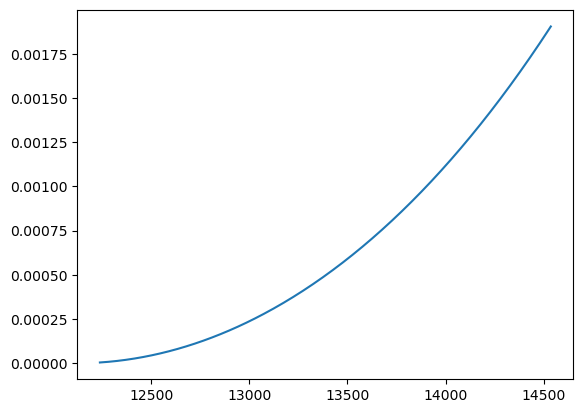

In [3]:
plt.plot(kArray, scatterIntensity)
plt.show()

# Add the themal motion

In [4]:
np.random.seed(100)

thermalNum =100  # Get 100 random thermal motion contributions

meanIntensity = np.zeros(kNum)
stdIntensity = np.zeros(kNum)

tic = time.time()
# Get a random motion
for tIdx in range(thermalNum):
    gaPos = gaArray + (np.random.rand(cellNum, 2) - 0.5) * c * 0.0001
    nPos = nArray + (np.random.rand(cellNum, 2) - 0.5) * c * 0.0001

    # Get all the scattering intensity
    intensityHolder = fGa * (np.mean(np.exp(1.j * np.outer(gaPos[:,0], kArray)), axis=0) + 
                              np.mean(np.exp(1.j * np.outer(gaPos[:,1], kArray)), axis=0))
    intensityHolder += fN * (np.mean(np.exp(1.j * np.outer(nPos[:,0], kArray)), axis=0) + 
                              np.mean(np.exp(1.j * np.outer(nPos[:,1], kArray)), axis=0))
    
    intensityHolder = np.abs(np.square(intensityHolder))
    meanIntensity += intensityHolder
    stdIntensity += np.square(intensityHolder)

meanIntensity /= thermalNum
stdIntensity /= thermalNum
stdIntensity -= np.square(meanIntensity)
stdIntensity = np.sqrt(stdIntensity)

toc = time.time()
print("It takes {:.2f} seconds for {} thermal copies".format(toc - tic, thermalNum))

It takes 30.49 seconds for 100 thermal copies


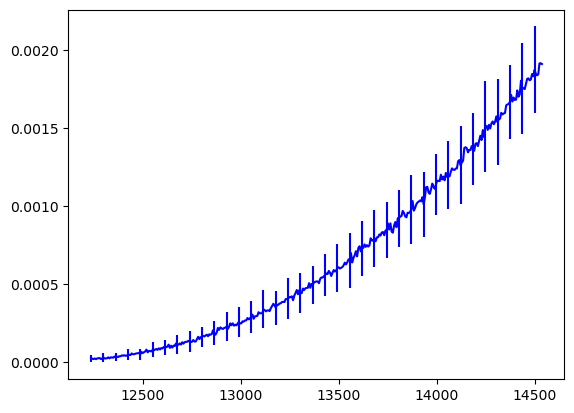

In [5]:
plt.errorbar(x=kArray, y = meanIntensity, yerr=stdIntensity, errorevery=10, color='blue')
plt.show()

# A different way to add the thermal motion

In [6]:
np.random.seed(5)


tgPeriod = 5e-3 # 5nm transient grating

# The adjustment percent of the unit cell size
percent = 1e-6

# Add a coherent lattice spacing change
randomPhase = np.random.rand(1) * np.pi * 2

gaArrayHot = np.zeros((cellNum, 2))   
gaArrayHot[:, 0] = np.cumsum(np.sin(gaArray[:,0] / tgPeriod * np.pi * 2 + randomPhase) * percent  + 1 )* c
gaArrayHot[:, 1] = gaArrayHot[:, 0] + 0.5 * np.sin(gaArray[:,0] / tgPeriod * np.pi * 2 + randomPhase) * percent * c

nArrayHot = np.zeros((cellNum, 2))   
nArrayHot[:, 0] = gaArrayHot[:, 0] + 3 / 8 * np.sin(gaArray[:,0] / tgPeriod * np.pi * 2 + randomPhase) * percent * c
nArrayHot[:, 1] = gaArrayHot[:, 0] + 7 / 8 * np.sin(gaArray[:,0] / tgPeriod * np.pi * 2 + randomPhase) * percent * c

thermalNum =100  # Get 100 random thermal motion contributions

meanIntensity1 = np.zeros(kNum)
stdIntensity1 = np.zeros(kNum)

tic = time.time()
# Get a random motion
for tIdx in range(thermalNum):
    
    gaPos = gaArrayHot + (np.random.rand(cellNum, 2) - 0.5) * c * 0.0001
    nPos = nArrayHot + (np.random.rand(cellNum, 2) - 0.5) * c * 0.0001

    # Get all the scattering intensity
    intensityHolder = fGa * (np.mean(np.exp(1.j * np.outer(gaPos[:,0], kArray)), axis=0) + 
                              np.mean(np.exp(1.j * np.outer(gaPos[:,1], kArray)), axis=0))
    intensityHolder += fN * (np.mean(np.exp(1.j * np.outer(nPos[:,0], kArray)), axis=0) + 
                              np.mean(np.exp(1.j * np.outer(nPos[:,1], kArray)), axis=0))
    
    intensityHolder = np.abs(np.square(intensityHolder))
    meanIntensity1 += intensityHolder
    stdIntensity1 += np.square(intensityHolder)

meanIntensity1 /= thermalNum
stdIntensity1 /= thermalNum
stdIntensity1 -= np.square(meanIntensity1)
stdIntensity1 = np.sqrt(stdIntensity1)

toc = time.time()
print("It takes {:.2f} seconds for {} thermal copies".format(toc - tic, thermalNum))


It takes 29.33 seconds for 100 thermal copies


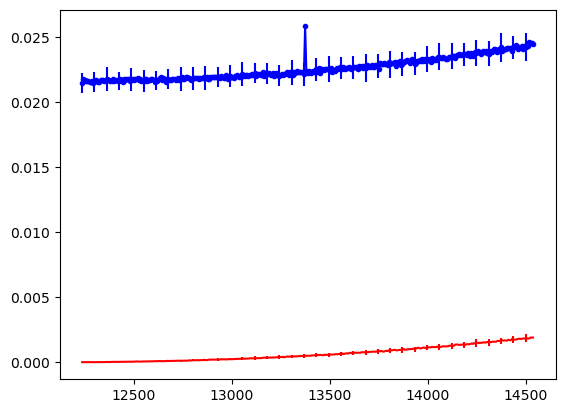

In [7]:
plt.errorbar(x=kArray, y = meanIntensity1, yerr=stdIntensity1, errorevery=10, color='blue', marker='.')
plt.errorbar(x=kArray, y = meanIntensity, yerr=stdIntensity, errorevery=10, color='red')
plt.show()

# Loop through different straining profile

In [8]:
strainArray = np.array([0.0, 10, 30, 50, 100]) * 5.59e-6
strainNum = strainArray.shape[0]

np.random.seed(15)

tgPeriod = 5e-3 # 5nm transient grating
thermalNum = 400  # Get 100 random thermal motion contributions

meanIntensityHolder = np.zeros((strainNum, kNum))
stdIntensityHolder = np.zeros((strainNum, kNum))

for strainIdx in range(strainNum):

    # The adjustment percent of the unit cell size
    percent = strainArray[strainIdx]

    # Add a coherent lattice spacing change
    randomPhase = np.random.rand(1) * np.pi * 2

    gaArrayHot = np.zeros((cellNum, 2))   
    gaArrayHot[:, 0] = np.cumsum(np.sin(gaArray[:,0] / tgPeriod * np.pi * 2 + randomPhase) * percent  + 1 )* c
    gaArrayHot[:, 1] = gaArrayHot[:, 0] + 0.5 * np.sin(gaArray[:,0] / tgPeriod * np.pi * 2 + randomPhase) * percent * c

    nArrayHot = np.zeros((cellNum, 2))   
    nArrayHot[:, 0] = gaArrayHot[:, 0] + 3 / 8 * np.sin(gaArray[:,0] / tgPeriod * np.pi * 2 + randomPhase) * percent * c
    nArrayHot[:, 1] = gaArrayHot[:, 0] + 7 / 8 * np.sin(gaArray[:,0] / tgPeriod * np.pi * 2 + randomPhase) * percent * c

    tic = time.time()
    # Get a random motion
    for tIdx in range(thermalNum):

        gaPos = gaArrayHot + (np.random.rand(cellNum, 2) - 0.5) * c * 0.0001
        nPos = nArrayHot + (np.random.rand(cellNum, 2) - 0.5) * c * 0.0001

        # Get all the scattering intensity
        intensityHolder = fGa * (np.mean(np.exp(1.j * np.outer(gaPos[:,0], kArray)), axis=0) + 
                                  np.mean(np.exp(1.j * np.outer(gaPos[:,1], kArray)), axis=0))
        intensityHolder += fN * (np.mean(np.exp(1.j * np.outer(nPos[:,0], kArray)), axis=0) + 
                                  np.mean(np.exp(1.j * np.outer(nPos[:,1], kArray)), axis=0))

        intensityHolder = np.abs(np.square(intensityHolder))
        meanIntensityHolder[strainIdx, :] += intensityHolder
        stdIntensityHolder[strainIdx, :] += np.square(intensityHolder)

    meanIntensityHolder[strainIdx, :] /= thermalNum
    stdIntensityHolder[strainIdx, :] /= thermalNum
    stdIntensityHolder[strainIdx, :] -= np.square(meanIntensityHolder[strainIdx, :])
    stdIntensityHolder[strainIdx, :] = np.sqrt(stdIntensityHolder[strainIdx, :])

    toc = time.time()
    print("It takes {:.2f} seconds for {} thermal copies".format(toc - tic, thermalNum))


It takes 121.24 seconds for 400 thermal copies
It takes 117.66 seconds for 400 thermal copies
It takes 114.17 seconds for 400 thermal copies
It takes 115.96 seconds for 400 thermal copies
It takes 114.39 seconds for 400 thermal copies


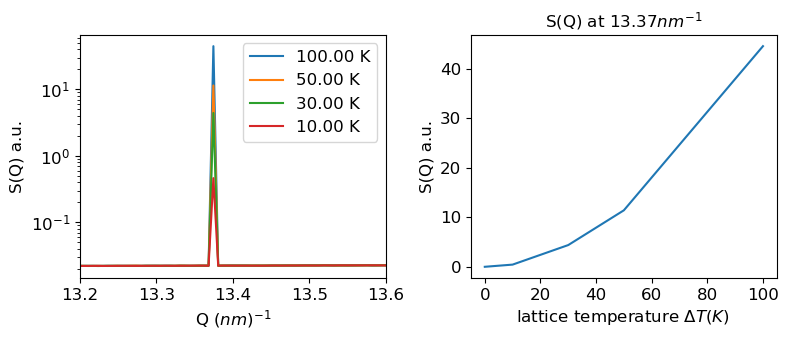

In [9]:
tempArray = strainArray / 5.59e-6 

fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_figheight(3.5)
fig.set_figwidth(8)

for strainIdx in range(strainNum-1, 0, -1):
    ax[0].semilogy( (kArray - 0) / 1000, meanIntensityHolder[strainIdx], label='{:.2f} K'.format(tempArray[strainIdx]))

ax[0].set_xlim([13.2, 13.6])
ax[0].set_ylabel("S(Q) a.u.", fontsize=12)
ax[0].set_xlabel("Q $(nm)^{-1}$", fontsize=12)
ax[0].legend(fontsize=12)
ax[0].tick_params(axis="both", labelsize=12)

qIdx = np.argmax(meanIntensityHolder[-1])
q = (kArray / 1000)[qIdx]
sQ = meanIntensityHolder[:, qIdx]

ax[1].plot(tempArray, sQ)
ax[1].set_xlabel("lattice temperature $\Delta T (K)$ ", fontsize=12)
ax[1].set_ylabel("S(Q) a.u.", fontsize=12)
ax[1].set_title("S(Q) at {:.2f}".format(q) + "$ nm^{-1}$", fontsize=12)
ax[1].tick_params(axis="both", labelsize=12)

plt.tight_layout()
plt.show()

In [10]:
from matplotlib import rcParams
rcParams['font.family'] = "Times New Roman"

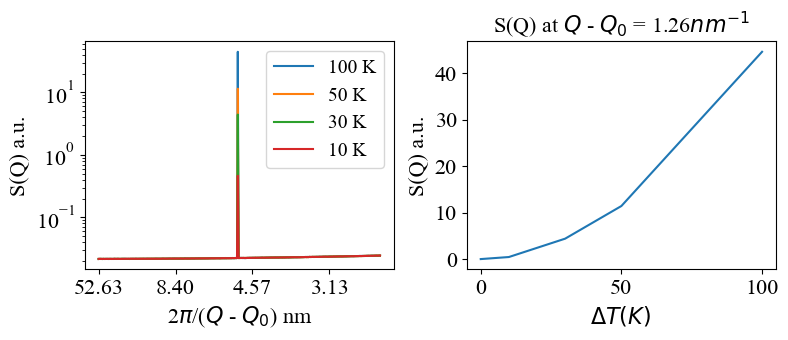

In [11]:
tempArray = strainArray / 5.59e-6 

fontsize=16

fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_figheight(3.5)
fig.set_figwidth(8)

for strainIdx in range(strainNum-1, 0, -1):
    ax[0].semilogy( (kArray - k0) / 1000, meanIntensityHolder[strainIdx], label='{:.0f} K'.format(tempArray[strainIdx]))

#ax[0].set_xlim([13.2, 13.6])
ax[0].set_ylabel("S(Q) a.u.", fontsize=fontsize)
ax[0].set_xlabel("2$\pi$/($Q$ - $Q_0$) nm", fontsize=fontsize)
ax[0].legend(fontsize=fontsize-2)
ax[0].tick_params(axis="both", labelsize=fontsize)
ax[0].set_xticks((kArray - k0)[::100] / 1000)
ax[0].set_xticklabels(["{:.2f}".format(2 * np.pi / x) for x in (kArray - k0)[::100] / 1000])

qIdx = np.argmax(meanIntensityHolder[-1])
q = (kArray / 1000)[qIdx]
sQ = meanIntensityHolder[:, qIdx]

ax[1].plot(tempArray, sQ)
ax[1].set_xlabel("$\Delta T (K)$ ", fontsize=fontsize)
ax[1].set_ylabel("S(Q) a.u.", fontsize=fontsize)
ax[1].set_title("S(Q) at $Q$ - $Q_0$ = {:.2f}".format(q - k0/1000) + "$  nm^{-1}$", fontsize=fontsize)
ax[1].tick_params(axis="both", labelsize=fontsize)

plt.tight_layout()
plt.savefig("C:/Users/haoyuan/Desktop/Sq.png", dpi=600)
plt.show()

# Make a plot of the GaN

In [12]:
k0/1000

12.11800444971955